In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from datetime import date, timedelta

import mechafil_jax.vesting as jax_vest
import mechafil.vesting as np_vest
import mechafil.data as data

import matplotlib.pyplot as plt

In [3]:
data.setup_spacescope('/Users/kiran/code/filecoin-mecha-twin/kiran_spacescope_auth.json')

In [4]:
start_date = date(2021, 3, 16)
forecast_length = 5*365
current_date = date.today() - timedelta(days=2)
end_date = current_date + timedelta(days=forecast_length)

In [5]:
start_vested_amt = int(data.get_vested_amount(start_date))

In [6]:
np_vesting_df = np_vest.compute_vesting_trajectory_df(start_date, end_date)

In [12]:
jax_vesting_dict = jax_vest.compute_vesting_trajectory(
    np.datetime64(start_date), 
    np.datetime64(end_date), 
    start_vested_amt
)

<IPython.core.display.Javascript object>


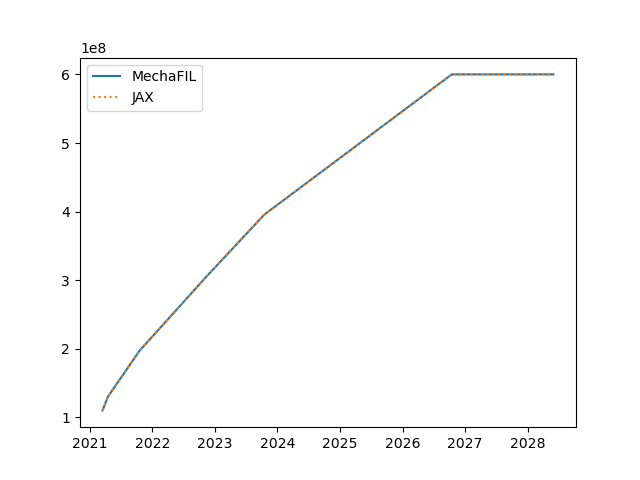

In [13]:
plt.figure()
plt.plot(np_vesting_df['date'], np_vesting_df['total_vest'], label='MechaFIL')
plt.plot(jax_vesting_dict['date'], jax_vesting_dict['total_vest'], label='JAX', linestyle=':')
plt.legend()